# Basic Asset Analysis

How to evaluate the performance of your assets?
Optimize your portfolio by reviewing the statistics of your stocks.

The goal is to generate an objective measure to validate the potential win against the risk. This method is know as the CAPM method. What we would like to see:
- Risk?
- Opportunity?
- Is the asset over- or under valued? (undervalued = potential that it will do well in the future)

## 1. Importing Libraries

In [18]:
import pandas_datareader as pdr
import numpy as np
import datetime as dt
import pandas as pd
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2. Calculating Beta
Beta expresses how "dynamic" an asset reacts to market fluctuations. A high beta means high risk, but also high opportunity, depending on the market.
- Beta < 1: More stable, but also less growth opportunity
- Beta > 1: More risky, but also higher win opportunity

### Process
- Get raw stock data of the market and the stocks of interest (can be 1 year, 3 years or other timeframe). Typically the S&P500 (Symbol "^GSPC") is used as the representation of the market data.
- Transform raw data into a dataframe with returns
- Calculate Beta
- Calculate the expected rate of return (CAPM method)
- Interprete the results

In [3]:
tickers = ['XIC.TO', '^GSPC', 'SHOP', 'TSLA', 'VFV.TO']
start = dt.datetime(2018, 12, 24)
end = dt.datetime(2021, 12, 24)
df_stocks = pdr.get_data_yahoo(tickers, start, end, interval="w")

df_stocks = df_stocks['Adj Close']

df_stocks

Symbols,XIC.TO,^GSPC,SHOP,TSLA,VFV.TO
Date,,,,,
2018-12-24,20.628248,2485.739990,133.460007,66.774002,57.719917
2018-12-31,21.067106,2531.939941,138.059998,63.537998,57.821960
2019-01-07,21.810974,2596.260010,149.429993,69.452003,58.763405
2019-01-14,22.361988,2670.709961,158.429993,60.452000,60.473385
2019-01-21,22.435457,2664.760010,162.820007,59.408001,60.089104
...,...,...,...,...,...
2021-12-06,33.360001,4712.020020,1461.579956,1017.030029,106.599998
2021-12-13,33.130001,4620.640137,1323.400024,932.570007,105.959999
2021-12-20,33.939999,4725.790039,1439.329956,1067.000000,107.730003


### Calculating Beta - Method 1

In [4]:
# Generating dataframe with returns
df_returns = np.log(df_stocks / df_stocks.shift())
df_returns

Symbols,XIC.TO,^GSPC,SHOP,TSLA,VFV.TO
Date,,,,,
2018-12-24,NaN,NaN,NaN,NaN,NaN
2018-12-31,0.021051,0.018415,0.033886,-0.049676,0.001766
2019-01-07,0.034700,0.025086,0.079140,0.088998,0.016151
2019-01-14,0.024949,0.028272,0.058485,-0.138786,0.028684
2019-01-21,0.003280,-0.002230,0.027333,-0.017421,-0.006375
...,...,...,...,...,...
2021-12-06,0.013885,0.037536,0.035928,0.002028,0.029222
2021-12-13,-0.006918,-0.019583,-0.099314,-0.086698,-0.006022
2021-12-20,0.024155,0.022501,0.083973,0.134662,0.016566


In [5]:
cov = df_returns.cov()
var = df_returns['^GSPC'].var()
beta_xic = cov.loc['XIC.TO', '^GSPC'] / var
beta_shop = cov.loc['SHOP', '^GSPC'] / var
beta_tsla = cov.loc['TSLA', '^GSPC'] / var
beta_vfv = cov.loc['VFV.TO', '^GSPC'] / var

In [6]:
print('Betas for XIC: {:1.2}, SHOPIFY: {:1.2}, Tesla: {:1.2}, Vanguard: {:1.2}'.format(beta_xic, beta_shop, beta_tsla, beta_vfv))

Betas for XIC: 0.79, SHOPIFY: 1.3, Tesla: 1.9, Vanguard: 0.78


### Calculating Beta - Method 2

In [7]:
def calc_return(df):
    '''Function to generate a detaframe with returns
    - Input: Dataframe with raw stock data
    - Output: Dataframe with returns'''

    x = df.copy()
    
    for i in range(1, len(df)):
        x.iloc[i] = (df.iloc[i] - df.iloc[i-1]) / df.iloc[i-1] * 100

    x.iloc[0] = 0

    return x

In [9]:
df_returns_alt = calc_return(df_stocks)
df_returns_alt

Symbols,XIC.TO,^GSPC,SHOP,TSLA,VFV.TO
Date,,,,,
2018-12-24,0.000000,0.000000,0.000000,0.000000,0.000000
2018-12-31,2.127461,1.858600,3.446719,-4.846203,0.176790
2019-01-07,3.530945,2.540347,8.235546,9.307824,1.628178
2019-01-14,2.526315,2.867585,6.022887,-12.958595,2.909940
2019-01-21,0.328545,-0.222785,2.770949,-1.726988,-0.635455
...,...,...,...,...,...
2021-12-06,1.398173,3.824887,3.658153,0.202967,2.965324
2021-12-13,-0.689447,-1.939293,-9.454148,-8.304575,-0.600375
2021-12-20,2.444907,2.275657,8.760007,14.415003,1.670446


In [12]:
df_returns_alt.dropna(inplace=True)

In [15]:
beta_xic_a, alpha_xic_a = np.polyfit(df_returns_alt['^GSPC'], df_returns_alt['XIC.TO'], 1)
beta_shop_a, alpha_shop_a = np.polyfit(df_returns_alt['^GSPC'], df_returns_alt['SHOP'], 1)
beta_tsla_a, alpha_tsla_a = np.polyfit(df_returns_alt['^GSPC'], df_returns_alt['TSLA'], 1)
beta_vfv_a, alpha_vfv_a = np.polyfit(df_returns_alt['^GSPC'], df_returns_alt['VFV.TO'], 1)

In [16]:
print('Betas for XIC: {:1.2}, SHOPIFY: {:1.2}, Tesla: {:1.2}, Vanguard: {:1.2}'.format(beta_xic_a, beta_shop_a, beta_tsla_a, beta_vfv_a))

Betas for XIC: 0.78, SHOPIFY: 1.4, Tesla: 1.9, Vanguard: 0.78


The results are slightly different, but close enough for the evaluation.

### Visualizing Beta

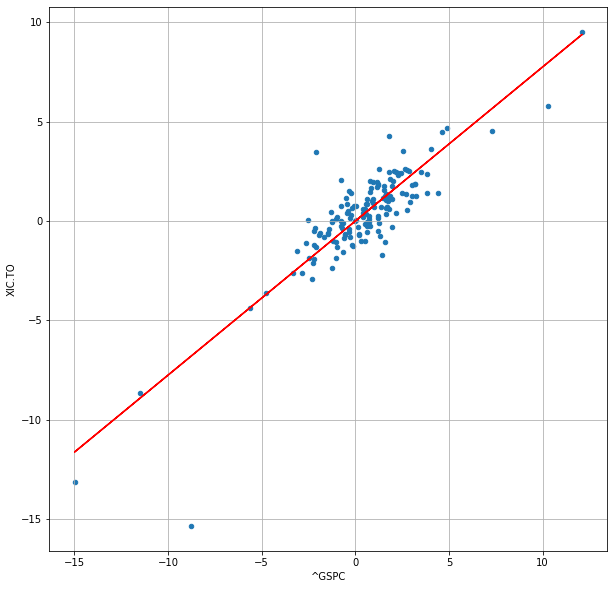

In [22]:
df_returns_alt.plot(kind='scatter', x = '^GSPC', y='XIC.TO', figsize=(10, 10))
plt.plot(df_returns_alt['^GSPC'], beta_xic_a * df_returns_alt['^GSPC'] + alpha_xic_a, '-', color='red')
plt.grid();

## 3. Calculating the Expected Rate of Return